In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr
import pandas as pd
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
# import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')


In [2]:
def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds


In [3]:
# Get states outline for cartopy
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

In [41]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map2d_SeasonalDifferences(ctlDS, testDS1, varSel, diffString1):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    
    # * Note: * Play around with coef on ranges to get a reasonable plot with enough detail 
    # Get ranges for differences 
    maxDiff   = np.nanpercentile(diffDS1[varSel].values,99.5)
    minDiff   = np.nanpercentile(diffDS1[varSel].values,0.5)
    valRange1 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    # * * * * * * * * * * * * * * * * * * * * * * * *  * * * * * * * * * * * *  * * * * * * * * * * * * 
    
    titleString1 = varSel+' '+diffString1
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(2,4, figsize=(17, 13), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = -0.5,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Set range of maps 
    lonMax = np.nanmax(ctlDS.lon.values)
    lonMin = np.nanmin(ctlDS.lon.values)
    latMax = np.nanmax(ctlDS.lat.values)
    latMin = np.nanmin(ctlDS.lat.values)
    
    axs[0].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[1].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[2].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[3].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[4].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[5].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[6].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[7].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    
    # Add states
    axs[0].add_feature(states_provinces, edgecolor='dimgray')
    axs[1].add_feature(states_provinces, edgecolor='dimgray')
    axs[2].add_feature(states_provinces, edgecolor='dimgray')
    axs[3].add_feature(states_provinces, edgecolor='dimgray')
    axs[4].add_feature(states_provinces, edgecolor='dimgray')
    axs[5].add_feature(states_provinces, edgecolor='dimgray')
    axs[6].add_feature(states_provinces, edgecolor='dimgray')
    axs[7].add_feature(states_provinces, edgecolor='dimgray')

    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
#     ctlMin = 0.85*(np.nanmin(ctlDS[varSel].values[:,:,:]))
#     ctlMax = 0.75*(np.nanmax(ctlDS[varSel].values[:,:,:]))
    ctlMin = np.nanpercentile(ctlDS[varSel].values, 10)
    ctlMax = np.nanpercentile(ctlDS[varSel].values, 99)
    
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow',transform=ccrs.PlateCarree())
    cplot1 = axs[1].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow',transform=ccrs.PlateCarree())
    cplot2 = axs[2].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow',transform=ccrs.PlateCarree())
    cplot3 = axs[3].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow',transform=ccrs.PlateCarree())
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic',transform=ccrs.PlateCarree())
    cplot5 = axs[5].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic',transform=ccrs.PlateCarree())
    cplot6 = axs[6].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic',transform=ccrs.PlateCarree())
    cplot7 = axs[7].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic',transform=ccrs.PlateCarree())

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    
    plt.show()


In [64]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
For most variables in CLUBB, need a level specified too, so levChoice = int. 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map_3dSeasonalDifferences(ctlDS, testDS1, varSel, levChoice, diffString1):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    
    # Get ranges for differences   
    maxDiff   = np.nanpercentile(diffDS1[varSel].values[:,levChoice,:,:],99)
    minDiff   = np.nanpercentile(diffDS1[varSel].values[:,levChoice,:,:],1)
    valRange1 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    titleString1 = varSel+' '+diffString1
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(2,4, figsize=(17, 13), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = -0.5,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Set range of maps 
    lonMax = np.nanmax(ctlDS.lon.values)
    lonMin = np.nanmin(ctlDS.lon.values)
    latMax = np.nanmax(ctlDS.lat.values)
    latMin = np.nanmin(ctlDS.lat.values)
    
    axs[0].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[1].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[2].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[3].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[4].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[5].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[6].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[7].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    
    # Add states
    axs[0].add_feature(states_provinces, edgecolor='dimgray')
    axs[1].add_feature(states_provinces, edgecolor='dimgray')
    axs[2].add_feature(states_provinces, edgecolor='dimgray')
    axs[3].add_feature(states_provinces, edgecolor='dimgray')
    axs[4].add_feature(states_provinces, edgecolor='dimgray')
    axs[5].add_feature(states_provinces, edgecolor='dimgray')
    axs[6].add_feature(states_provinces, edgecolor='dimgray')
    axs[7].add_feature(states_provinces, edgecolor='dimgray')

    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
#     ctlMin = 0.95*(np.nanmin(ctlDS[varSel].values[:,levChoice,:,:]))
#     ctlMax = 0.85*(np.nanmax(ctlDS[varSel].values[:,levChoice,:,:]))
    ctlMin = np.nanpercentile(ctlDS[varSel].values[:,levChoice,:,:], 10)
    ctlMax = np.nanpercentile(ctlDS[varSel].values[:,levChoice,:,:], 95)
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow', transform=ccrs.PlateCarree())
    cplot1 = axs[1].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow', transform=ccrs.PlateCarree())
    cplot2 = axs[2].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow', transform=ccrs.PlateCarree())
    cplot3 = axs[3].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow', transform=ccrs.PlateCarree())
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
#    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic', transform=ccrs.PlateCarree())
    cplot5 = axs[5].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic', transform=ccrs.PlateCarree())
    cplot6 = axs[6].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic', transform=ccrs.PlateCarree())
    cplot7 = axs[7].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic', transform=ccrs.PlateCarree())

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
#     cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    
    plt.show()


## Read in CLUBB moments 

In [6]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/zetaTests_gobal/'

controlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_clubbVars.nc'
zbotFile    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-00005_clubbVars.nc'

with xr.open_dataset(controlFile, decode_times=False) as ctrlDS: 
    ctrlDS = cesm_correct_time(ctrlDS)
    
with xr.open_dataset(zbotFile,decode_times=False) as zbotDS: 
    zbotDS = cesm_correct_time(zbotDS)

    

In [7]:
controlFile_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_otherVars.nc'
zbotFile_otherVars    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_otherVars.nc'

with xr.open_dataset(controlFile_otherVars, decode_times=False) as ctrlDS_other: 
    ctrlDS_other = cesm_correct_time(ctrlDS_other)
    
with xr.open_dataset(zbotFile_otherVars,decode_times=False) as zbotDS_other: 
    zbotDS_other = cesm_correct_time(zbotDS_other)


Add TS and RELHUM to variables contained in "otherVars"

In [8]:
zbotFile_TS    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_TS.nc'

with xr.open_dataset(zbotFile_TS,decode_times=False) as zbotDS_TS: 
    zbotDS_TS = cesm_correct_time(zbotDS_TS)
    
zbotDS_other['TS'] = zbotDS_TS.TS


In [9]:
controlFile_RH = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_RH.nc'
zbotFile_RH    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_RH.nc'

with xr.open_dataset(controlFile_RH, decode_times=False) as ctrlDS_RH: 
    ctrlDS_RH = cesm_correct_time(ctrlDS_RH)
    
with xr.open_dataset(zbotFile_RH,decode_times=False) as zbotDS_RH: 
    zbotDS_RH = cesm_correct_time(zbotDS_RH)

    
ctrlDS_other['RELHUM'] = ctrlDS_RH.RELHUM
zbotDS_other['RELHUM'] = zbotDS_RH.RELHUM


Figured out some other vars we want to look at, so adding them to the DS's above here:

In [10]:
controlFile_other2 = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_otherVarsV2.nc'
zbotFile_other2    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_otherVarsV2.nc'

with xr.open_dataset(controlFile_other2, decode_times=False) as ctrlDS_other2: 
    ctrlDS_other2 = cesm_correct_time(ctrlDS_other2)
    
with xr.open_dataset(zbotFile_other2,decode_times=False) as zbotDS_other2: 
    zbotDS_other2 = cesm_correct_time(zbotDS_other2)


# Merge with appropriate datasets 
ctrlDS['WPTHVP_CLUBB']  = ctrlDS_other2.WPTHVP_CLUBB
zbotDS['WPTHVP_CLUBB']  = zbotDS_other2.WPTHVP_CLUBB

ctrlDS_other  = xr.merge([ctrlDS_other,  ctrlDS_other2])
zbotDS_other  = xr.merge([zbotDS_other,  zbotDS_other2])


Seasonal average and (if desired) pick out only a particular region for analysis:

In [15]:
# Calculate seasonal averages
ctrlDS_seasonal  = ctrlDS.groupby('time.season').mean('time')
zbotDS_seasonal  = zbotDS.groupby('time.season').mean('time')

ctrlDSother_seasonal  = ctrlDS_other.groupby('time.season').mean('time')
zbotDSother_seasonal  = zbotDS_other.groupby('time.season').mean('time')


In [16]:
# What if we only want to see the US? 
# ilat = np.where( (ctrlDSother_seasonal.lat.values>=19) & (ctrlDSother_seasonal.lat.values<=61) )[0]
# ilon = np.where( (ctrlDSother_seasonal.lon>=221.0) & (ctrlDSother_seasonal.lon<=311.0) )[0]

# Let's focus in on the West Pacific
ilat = np.where( (ctrlDSother_seasonal.lat.values>=-20) & (ctrlDSother_seasonal.lat.values<=60) )[0]
ilon = np.where( (ctrlDSother_seasonal.lon>=70.0) & (ctrlDSother_seasonal.lon<=200.0) )[0]

ctrlDSother_seasonal  = ctrlDSother_seasonal.isel(lon=ilon,  lat=ilat)
zbotDSother_seasonal  = zbotDSother_seasonal.isel(lon=ilon,  lat=ilat)

ctrlDS_seasonal  = ctrlDS_seasonal.isel(lon=ilon,  lat=ilat)
zbotDS_seasonal  = zbotDS_seasonal.isel(lon=ilon,  lat=ilat)


## Plot maps

### Other variables

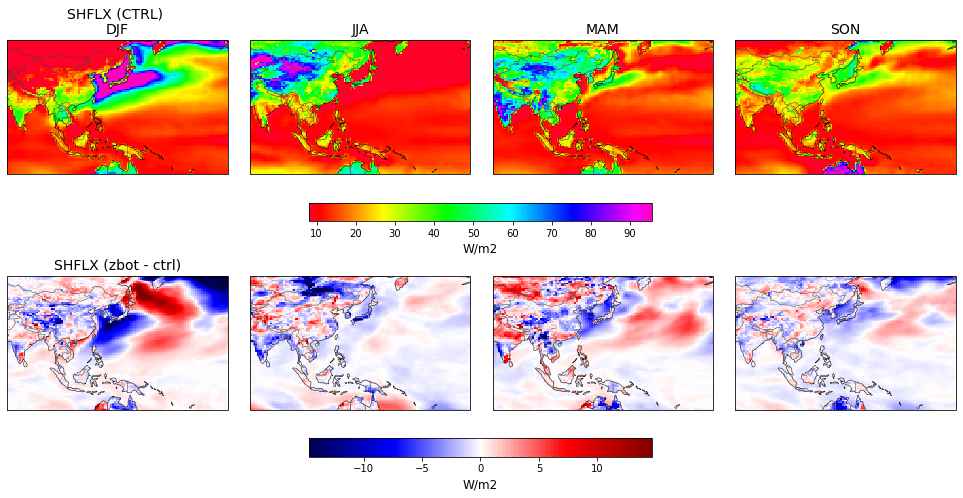

In [42]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'SHFLX', 
                         '(zbot - ctrl)')


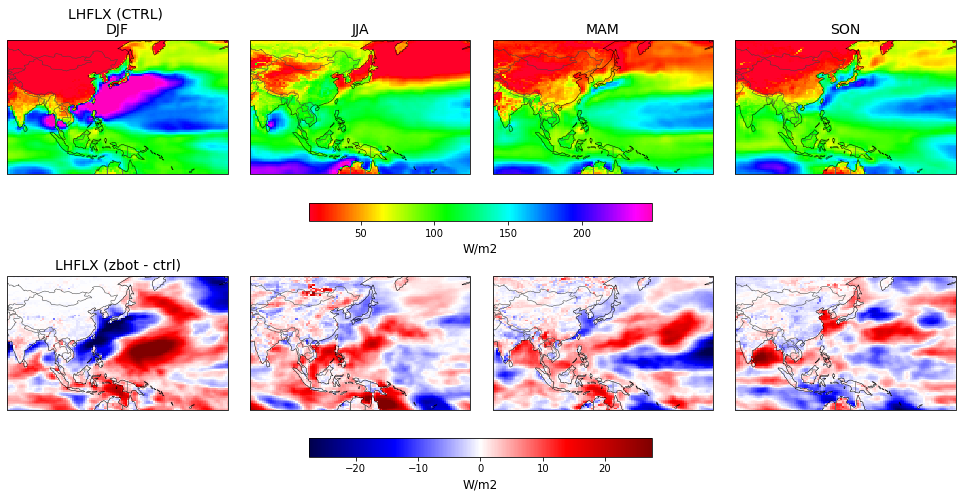

In [43]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'LHFLX', 
                         '(zbot - ctrl)')


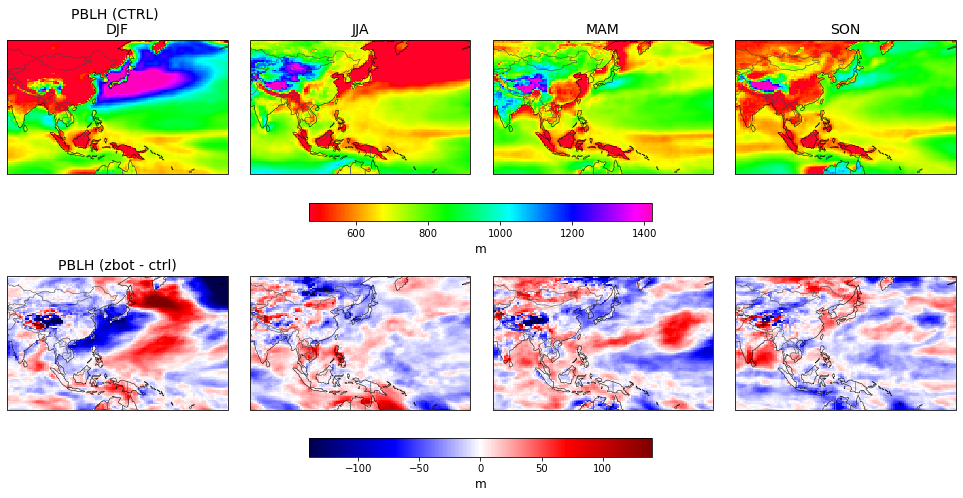

In [44]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'PBLH', 
                         '(zbot - ctrl)')



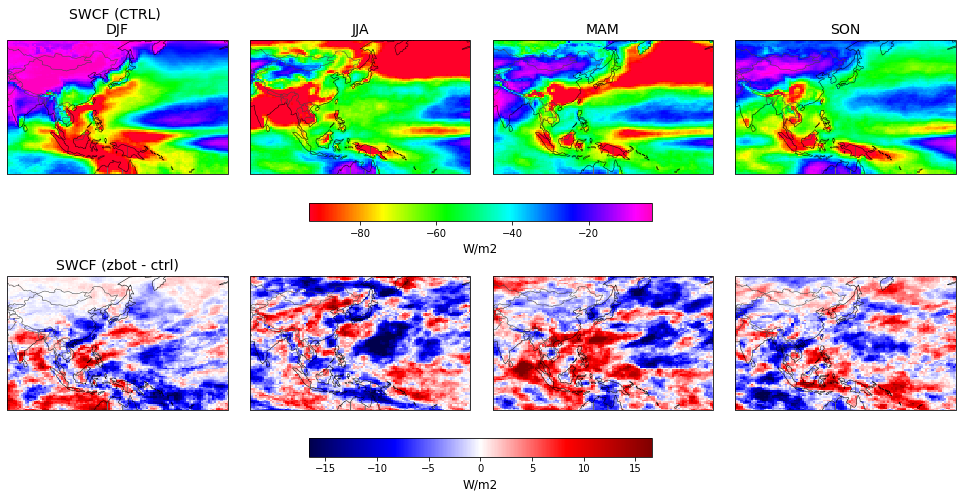

In [45]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'SWCF', 
                         '(zbot - ctrl)')


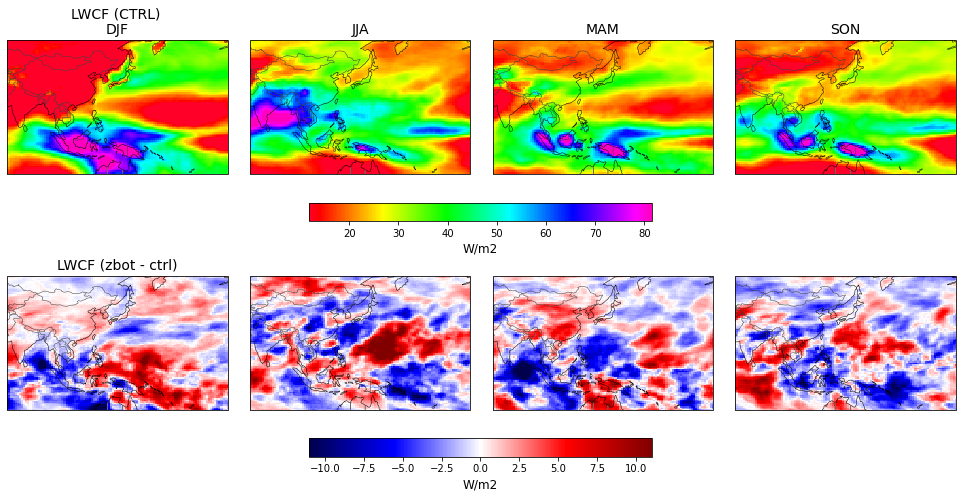

In [46]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'LWCF', 
                         '(zbot - ctrl)')

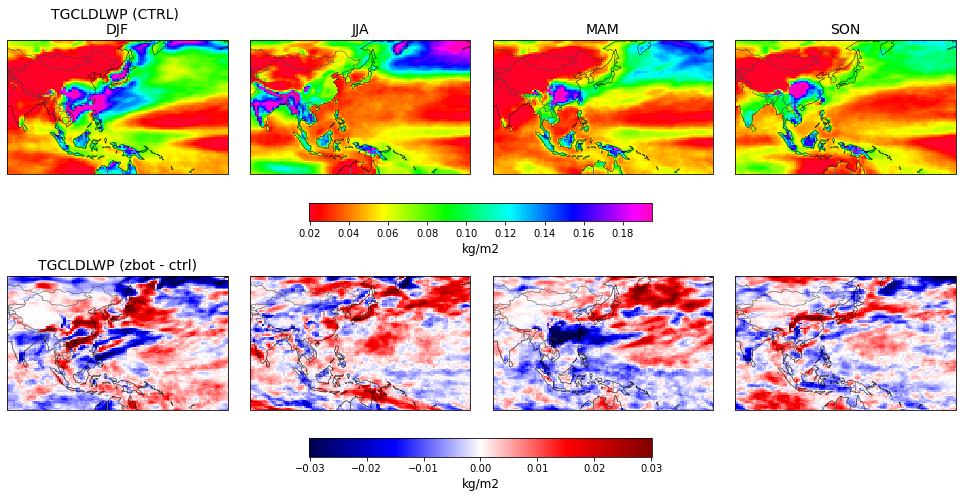

In [47]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'TGCLDLWP', 
                         '(zbot - ctrl)')


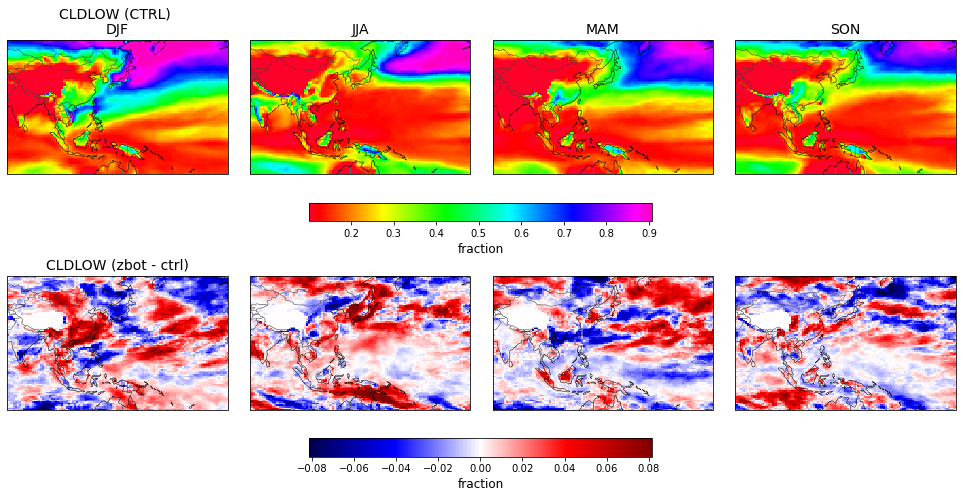

In [48]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'CLDLOW', 
                         '(zbot - ctrl)')


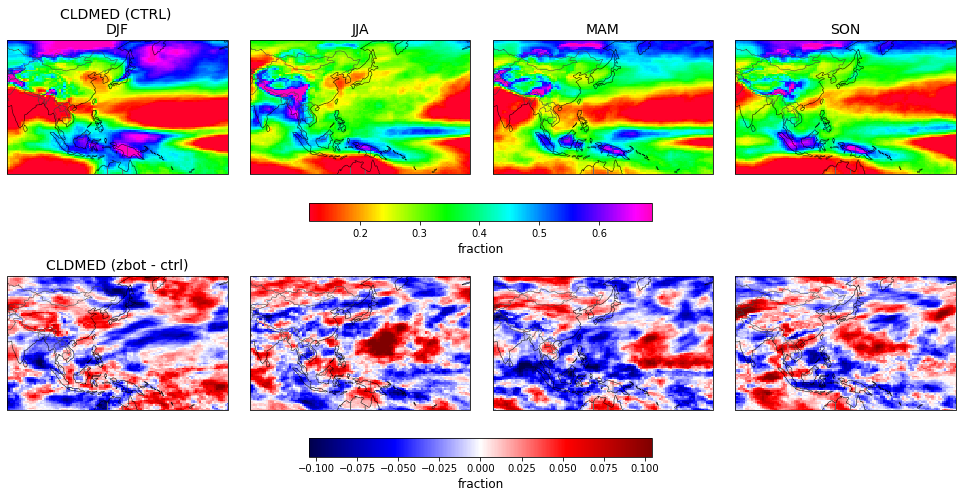

In [49]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'CLDMED', 
                         '(zbot - ctrl)')


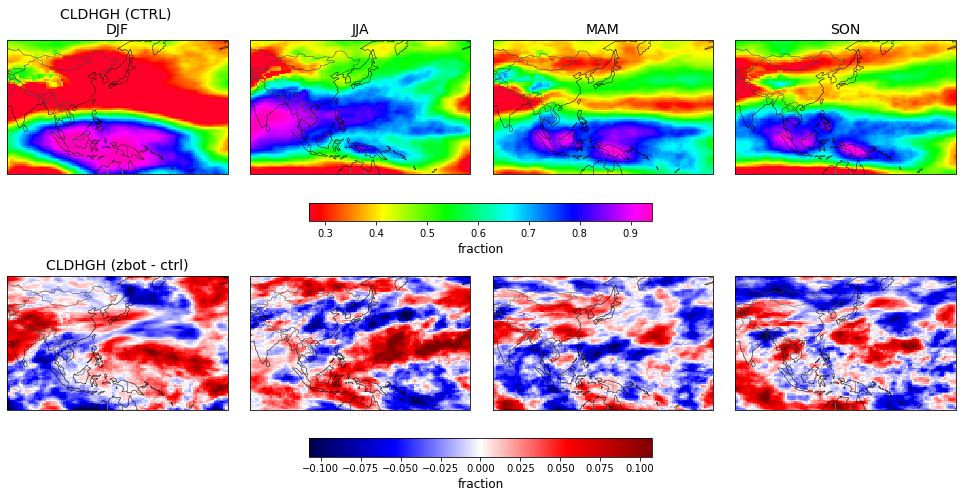

In [50]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'CLDHGH', 
                         '(zbot - ctrl)')


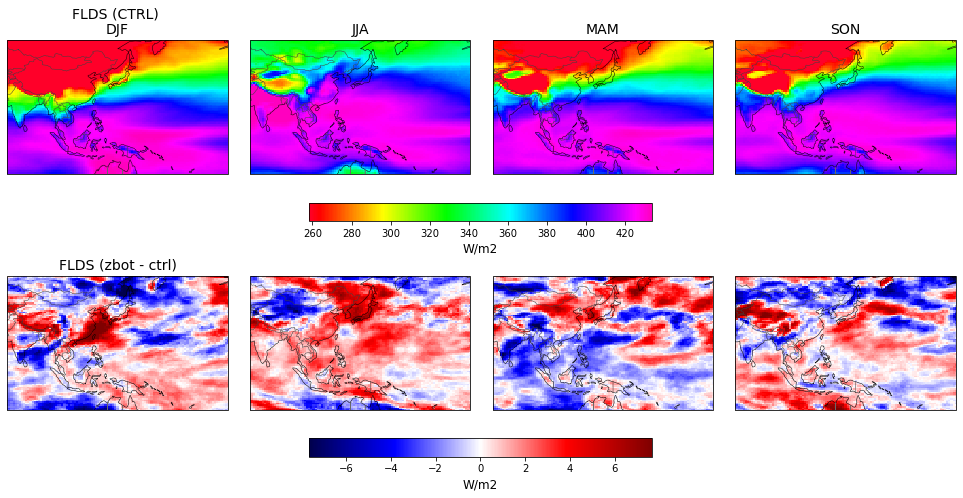

In [51]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'FLDS', 
                         '(zbot - ctrl)')


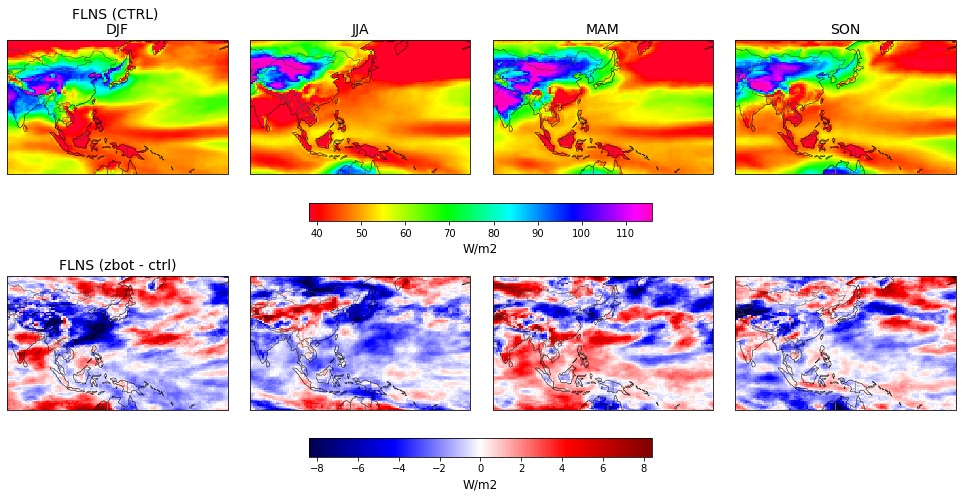

In [52]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'FLNS', 
                         '(zbot - ctrl)')

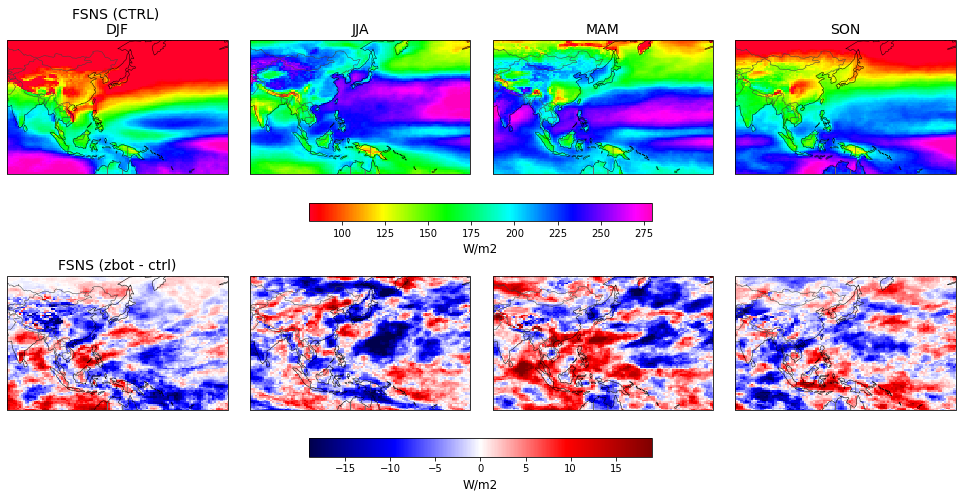

In [53]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'FSNS', 
                         '(zbot - ctrl)')

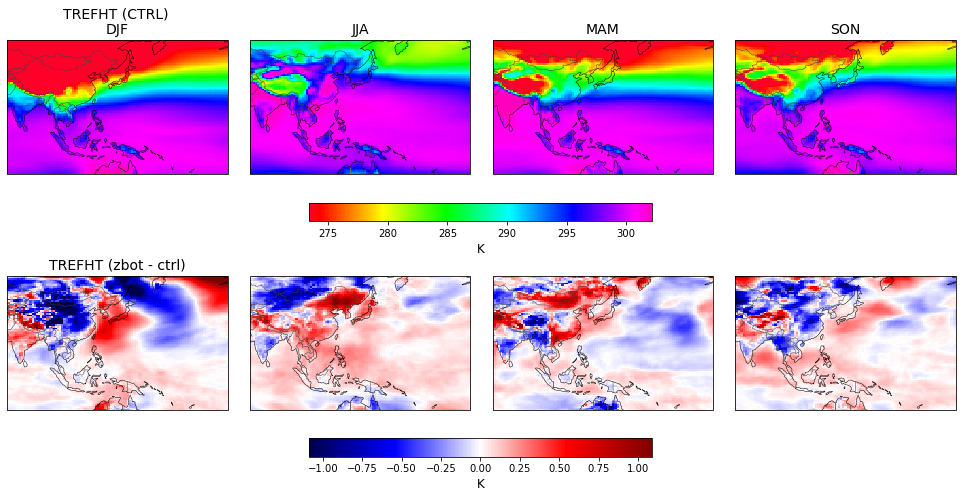

In [54]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'TREFHT', 
                         '(zbot - ctrl)')

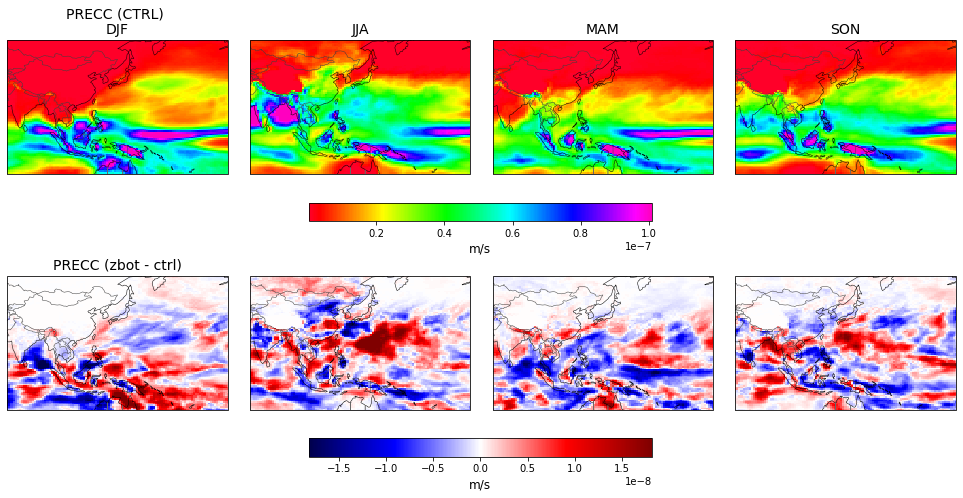

In [55]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'PRECC', 
                         '(zbot - ctrl)')

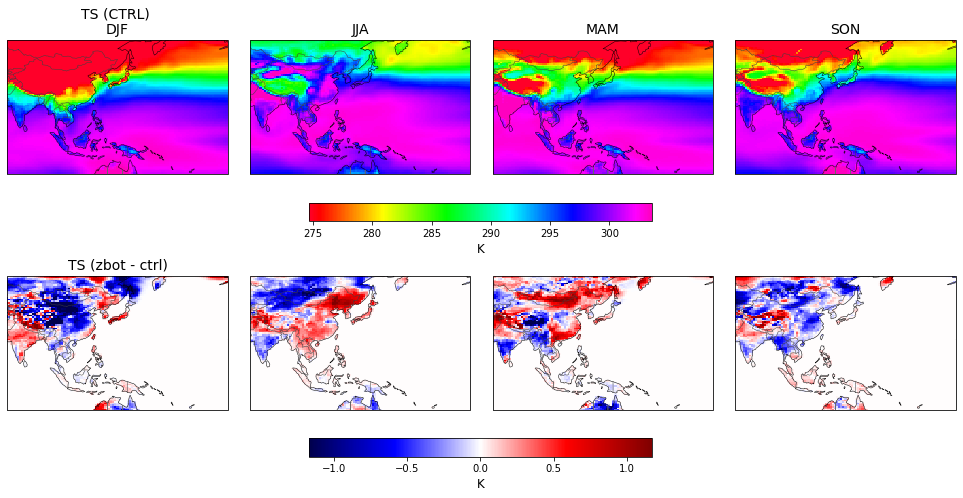

In [56]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'TS', 
                         '(zbot - ctrl)')

In [58]:
## Also take a look at TBOT and (TBOT-TS)
ctrlDSother_seasonal['TBOT']   = ctrlDSother_seasonal['T'].isel(lev=-1)
zbotDSother_seasonal['TBOT']   = zbotDSother_seasonal['T'].isel(lev=-1)

ctrlDSother_seasonal['TBOT-TS']  = ctrlDSother_seasonal['TBOT'] - ctrlDSother_seasonal['TS']
zbotDSother_seasonal['TBOT-TS']  = zbotDSother_seasonal['TBOT'] - zbotDSother_seasonal['TS']

# For labeling purposes, also put into ctrlDS_other
ctrlDS_other['TBOT'] = ctrlDSother_seasonal['T'].isel(lev=-1)
ctrlDS_other['TBOT-TS']  = ctrlDS_other['TBOT'] - ctrlDS_other['TS']
ctrlDS_other['TBOT'].attrs['units'] = 'K'
ctrlDS_other['TBOT-TS'].attrs['units'] = 'K'



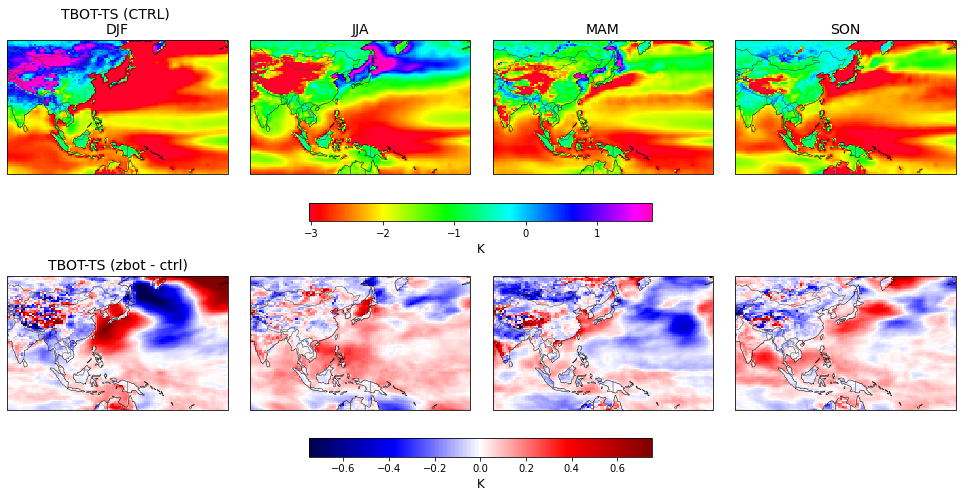

In [59]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          zbotDSother_seasonal,
                         'TBOT-TS', 
                         '(zbot - ctrl)')



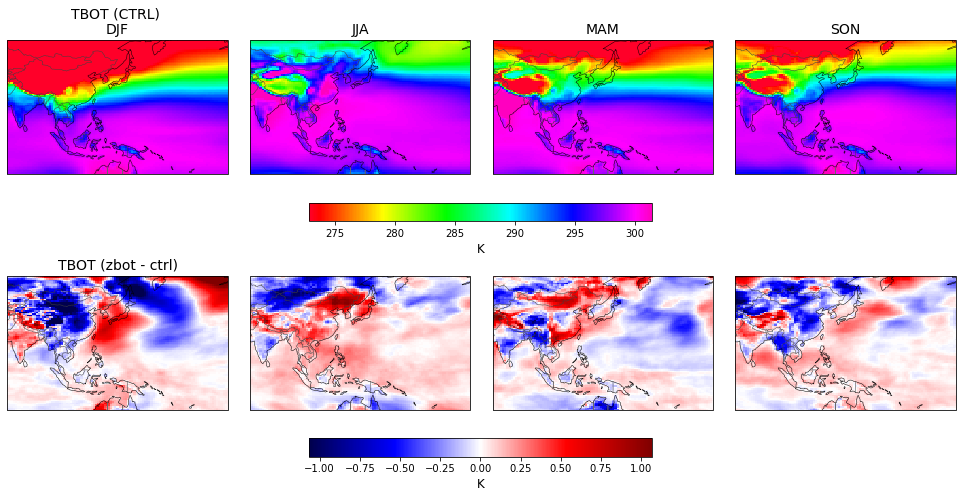

In [60]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                        zbotDSother_seasonal,
                        'TBOT', 
                        '(zbot - ctrl)')



### CLUBB Variables

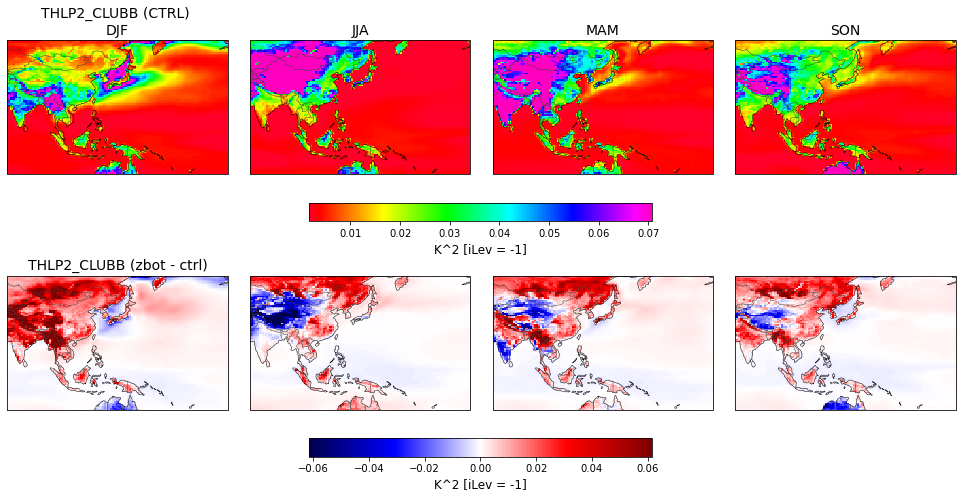

In [65]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                         zbotDS_seasonal,
                        'THLP2_CLUBB', -1, 
                        '(zbot - ctrl)')


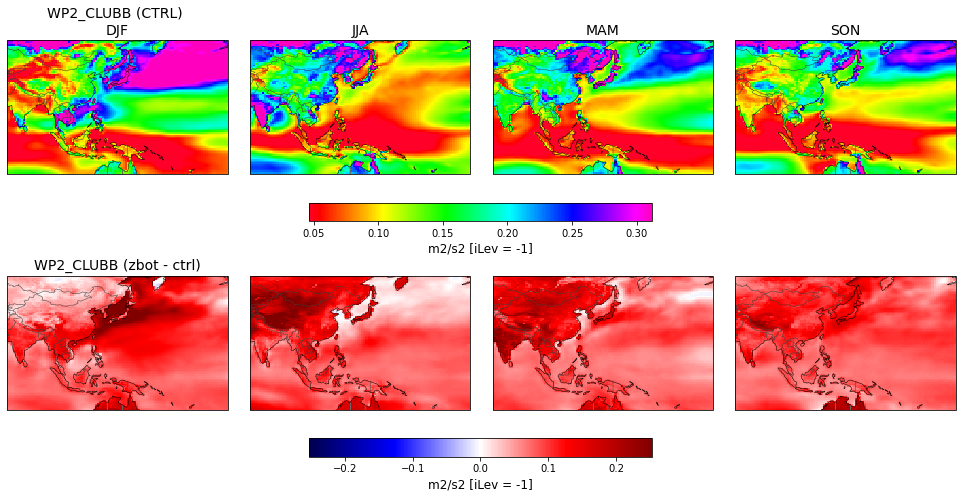

In [67]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'WP2_CLUBB', -1, 
                        '(zbot - ctrl)')


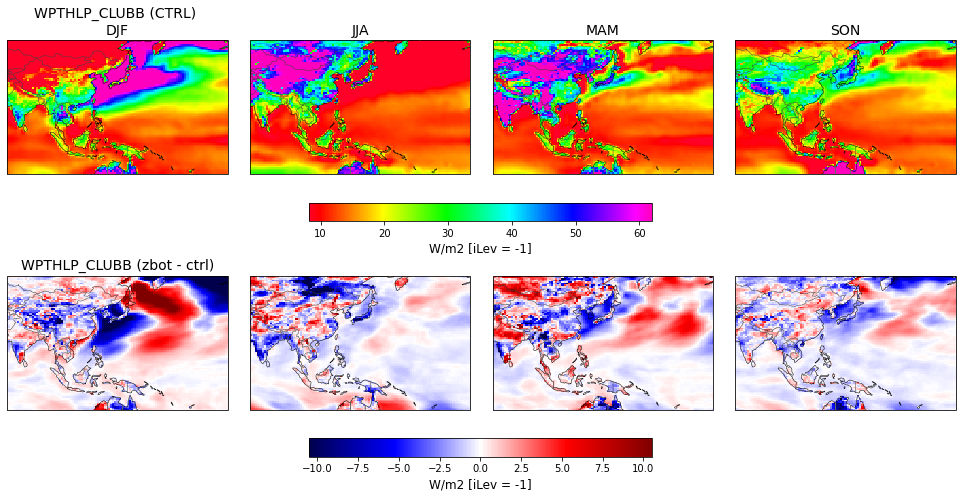

In [68]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'WPTHLP_CLUBB', -1, 
                        '(zbot - ctrl)')


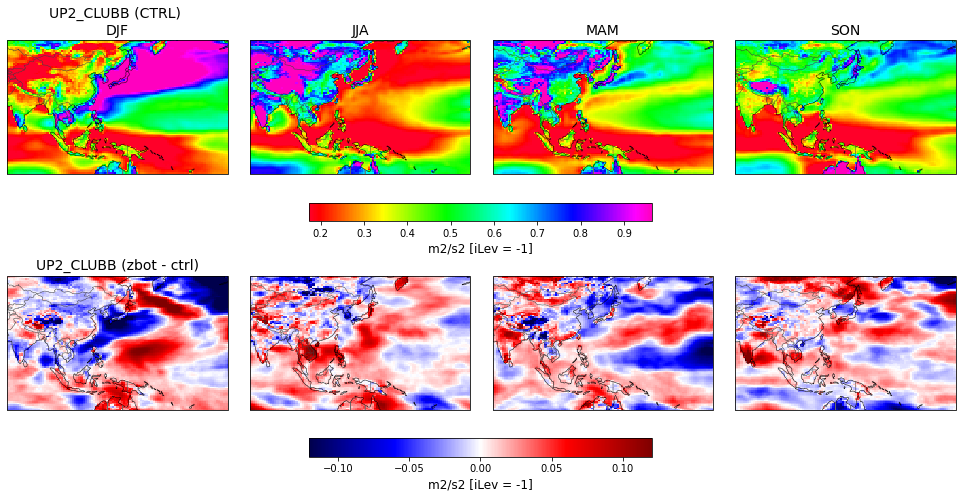

In [69]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'UP2_CLUBB', -1, 
                        '(zbot - ctrl)')


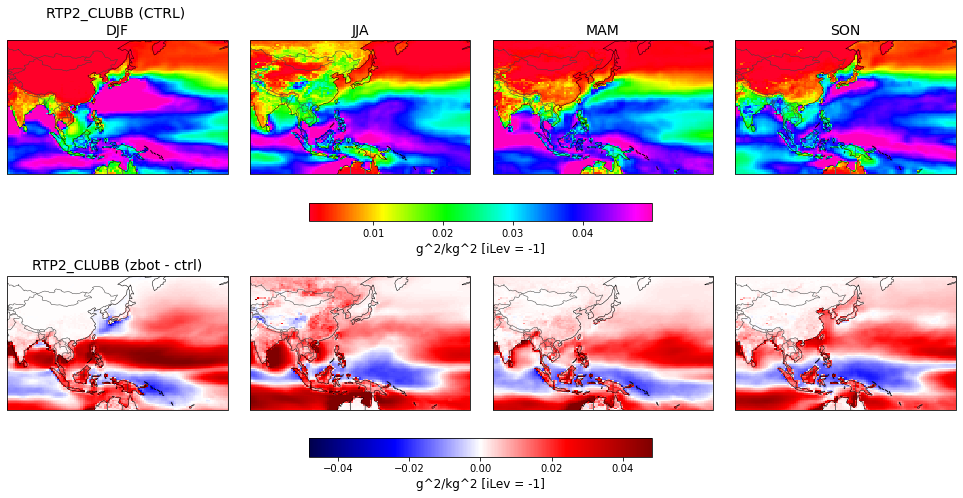

In [70]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'RTP2_CLUBB', -1, 
                        '(zbot - ctrl)')


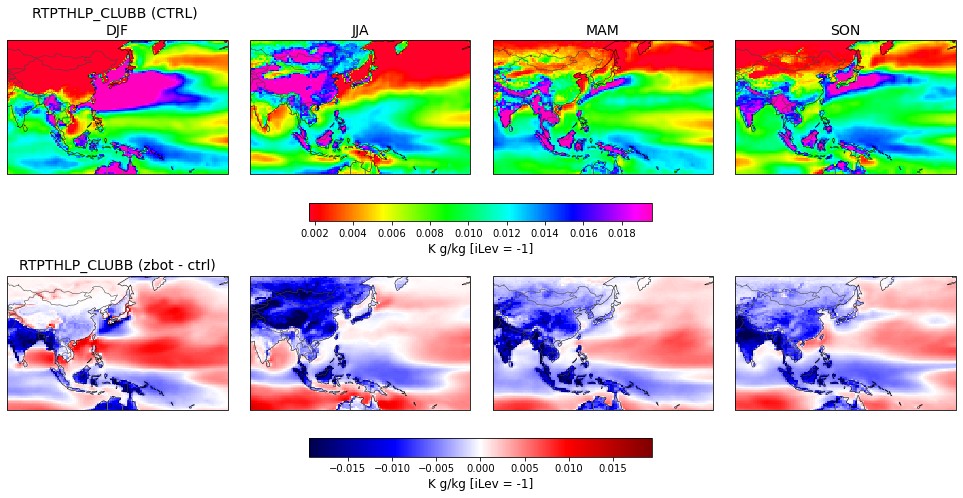

In [71]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'RTPTHLP_CLUBB', -1, 
                        '(zbot - ctrl)')


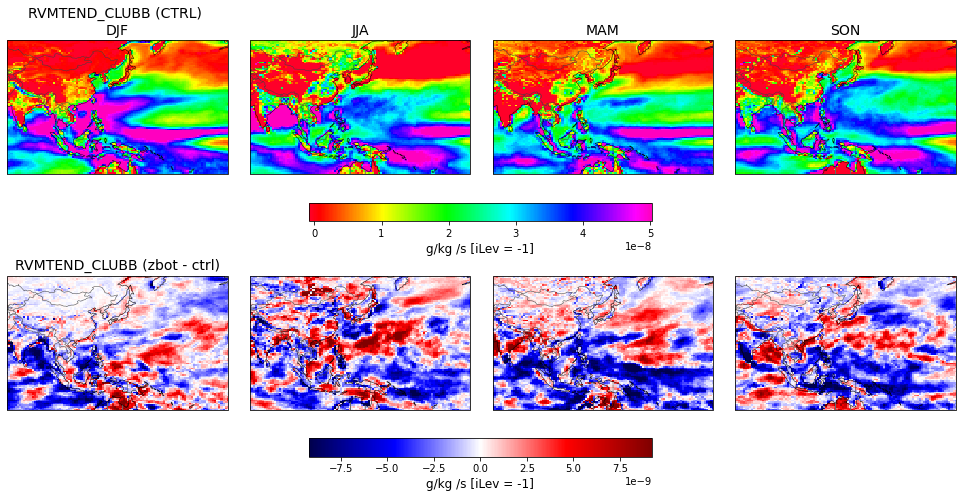

In [72]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'RVMTEND_CLUBB', -1, 
                        '(zbot - ctrl)')


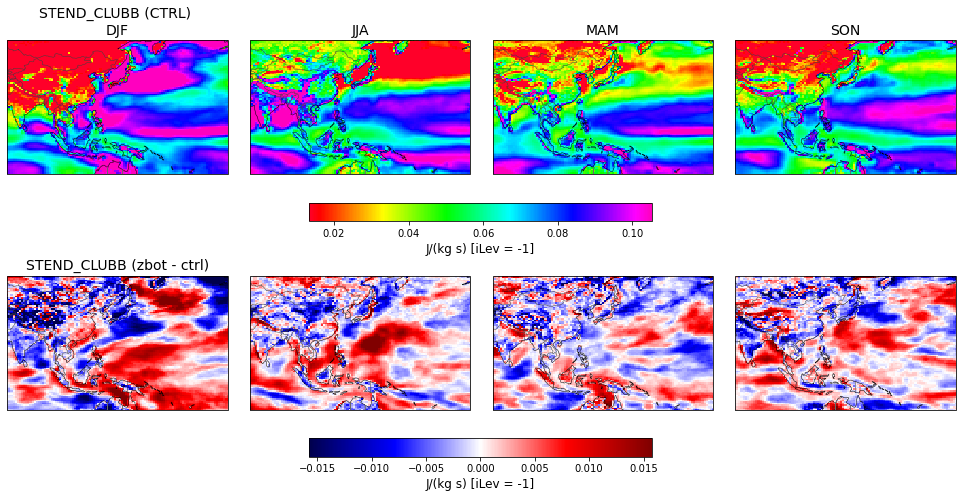

In [73]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'STEND_CLUBB', -1, 
                        '(zbot - ctrl)')


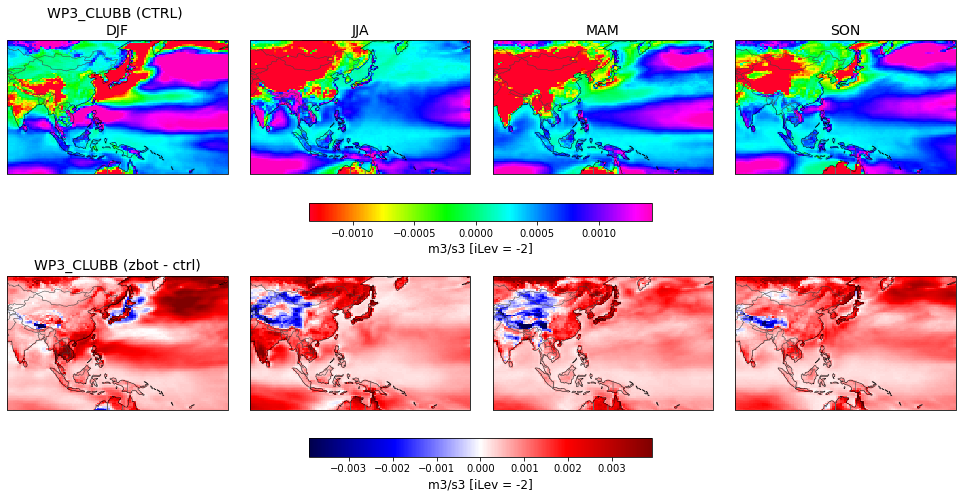

In [74]:
map_3dSeasonalDifferences(ctrlDS_seasonal, 
                        zbotDS_seasonal,
                        'WP3_CLUBB', -2, 
                        '(zbot - ctrl)')



## PDFs of *daily* surface variables of interest

In [141]:
dailyCtrlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h1.0002-0005_dailySfcVars.nc'
dailyZbotFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h1.0002-0005_dailySfcVars.nc'

with xr.open_dataset(dailyCtrlFile, decode_times=False) as dailyCtrlDS: 
    dailyCtrlDS = cesm_correct_time(dailyCtrlDS)
    
with xr.open_dataset(dailyZbotFile, decode_times=False) as dailyZbotDS: 
    dailyZbotDS = cesm_correct_time(dailyZbotDS)
    
    


In [143]:
dailyCtrlDS

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1436)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 0002-01-25 12:00:00 ... 0005-12-31 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) object ...
    LHFLX      (time, lat, lon) float32 ...
    PBLH       (time, lat, lon) float32 ...
    PRECT      (time, lat, lon) float32 ...
    QREFHT     (time, lat, lon) float32 ...
    RHREFHT    (time, lat, lon) float32 ...
    SHFLX      (time, lat, lon) float32 ...
    TREFHT     (time, lat, lon) float32 ...
    U10        (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions...
    logname:           mdfowler
    host:              cheyenne2
    initial_file:      /glade/p/cesmdata/cseg/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1
    history:           Fri Apr 30 15:27:40 2021: ncrcat -v TREFHT,PRECT,QREFH...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....

Text(0.5, 1.0, 'PRECT distribution')

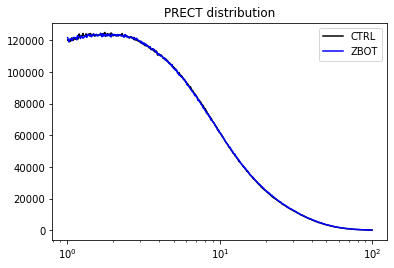

In [180]:
#testFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h1.0002-0005_dailySfcVars.nc'

# Get daily total rain rate and convert from m/s to mm/day: 
prect_ctrl = (dailyCtrlDS.PRECT.values)*86400.0*1000.0
prectZbot  = (dailyZbotDS.PRECT.values)*86400.0*1000.0

binEdges = np.logspace(0,2,num=500)
# binEdges = np.insert(binEdges, 0, 0.5)

histBin,binEdge         = np.histogram(prect_ctrl.reshape([1436*192*288,1]), bins=binEdges)
histBinZBOT,binEdgeZBOT = np.histogram(prectZbot.reshape([1436*192*288,1]), bins=binEdges)

binMidpoint = np.full([len(binEdge)-1], np.nan)
binMidpoint_zbot = np.full([len(binEdge)-1], np.nan)

for iBin in range(len(binEdge)-1): 
    binWidth = (binEdge[iBin+1]-binEdge[iBin])/2.0
    binMidpoint[iBin] = binEdge[iBin]+binWidth
    
    binWidth_zbot = (binEdgeZBOT[iBin+1]-binEdgeZBOT[iBin])/2.0
    binMidpoint_zbot[iBin] = binEdgeZBOT[iBin]+binWidth_zbot

    
# Plot distribution 
plt.semilogx(binMidpoint,histBin,'k-')
plt.semilogx(binMidpoint_zbot,histBinZBOT,'b-')
plt.legend(['CTRL','ZBOT'])
plt.title('PRECT distribution')

In [182]:
np.nanmax(dailyCtrlDS.TREFHT.values)

316.91467

Text(0.5, 1.0, 'TREFHT distribution')

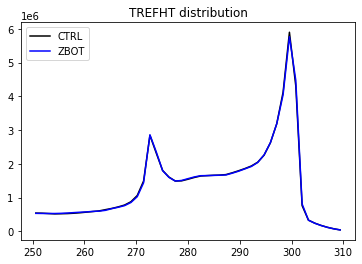

In [188]:
#testFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h1.0002-0005_dailySfcVars.nc'

# Get daily total rain rate and convert from m/s to mm/day: 
TREFHT_ctrl = (dailyCtrlDS.TREFHT.values)
TREFHTZbot  = (dailyZbotDS.TREFHT.values)

binEdges = np.linspace(250,310,num=50)
# binEdges = np.insert(binEdges, 0, 0.5)

histBin,binEdge         = np.histogram(TREFHT_ctrl.reshape([1436*192*288,1]), bins=binEdges)
histBinZBOT,binEdgeZBOT = np.histogram(TREFHTZbot.reshape([1436*192*288,1]), bins=binEdges)

binMidpoint = np.full([len(binEdge)-1], np.nan)
binMidpoint_zbot = np.full([len(binEdge)-1], np.nan)

for iBin in range(len(binEdge)-1): 
    binWidth = (binEdge[iBin+1]-binEdge[iBin])/2.0
    binMidpoint[iBin] = binEdge[iBin]+binWidth
    
    binWidth_zbot = (binEdgeZBOT[iBin+1]-binEdgeZBOT[iBin])/2.0
    binMidpoint_zbot[iBin] = binEdgeZBOT[iBin]+binWidth_zbot
    
# Plot distribution 
plt.plot(binMidpoint,histBin,'k-')
plt.plot(binMidpoint_zbot,histBinZBOT,'b-')
plt.legend(['CTRL','ZBOT'])
plt.title('TREFHT distribution')